In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats

<h2 style="color: green;">Basic - 비모수 검정</h2>

비모수 검정(Non-parametric test)은 모집단의 분포 형태나 모수(모집단의 평균, 분산 등)가 정확 히 알려져 있지 않은 경우, 혹은 모집단의 분포가 정규분포를 따르지 않는 경우에 사용하는 검정 방법입니다.

모수 검정은 모집단의 분포가 정규분포를 따른다는 가정 하에 진행되는 반면, 비모수 검정은 분포 의 형태나 모수가 불확실할 때 사용하며, 대부분 자료의 순위(rank)를 이용해 검정을 수행합니다. 비모수 검정의 장점은 데이터 분포나 크기에 대한 가정이 필요하지 않다는 것입니다. 따라서, 데이 터가 정규분포를 따르지 않을 때나, 작은 샘플인 경우에도 적용이 가능합니다.

하지만, 비모수 검정은 모수 검정보다 유연성은 높지만, 검정력이 낮을 수 있다는 한계가 있습니다. 또한, 데이터의 순위에만 의존하므로 정보 손실이 발생할 가능성이 있습니다. 따라서, 분석하고자 하는 데이터의 특성에 맞는 적절한 검정 방법을 선택해야 합니다.

In [2]:
np.random.seed(42)

#모수 검정용 데이터 생성
n = 100
mu1, mu2 = 0, 0.5
sigma = 1
data1 = np.random.normal(mu1, sigma, n)
data2 = np.random.normal(mu2, sigma, n)

#print(data1, data2)

#비모수 검정용 데이터 생성
m = 30
data3 = np.random.uniform(0,1,m)
data4 = np.random.uniform(0.5, 1.5, m)

#print(data3, data4)

In [4]:
#데이터 생성 완료 -> 모수 검정 실시
t_stat, p_val =  stats.ttest_ind(data1, data2)
print(t_stat, p_val)

-4.754695943505288 3.819135262679341e-06


In [6]:
#데이터 생성 완료 -> 비모수 검정 실시
t_stat, p_val = stats.mannwhitneyu(data3, data4)
print(t_stat, p_val)

145.0 6.7362128931226e-06


### *부호 검정*

부호 검정(Sign Test)은 비모수적인 방법 중 하나로, 모집단의 분포에 대한 가정 없이 두 개의 집단이 같은 분포를 가지고 있는지를 검정하는 방법입니다. 부호 검정은 두 개의 집단에서 각각 쌍을 이루는 데이터에 대해, 그 값의 차이가 0인 경우에는 부호를 생략하고, 값의 차이가 0보다 큰 경우는 "+", 작은 경우는 "-"로 기호를 붙인 다음, "+", "-"의 개수를 세어 이항 검정을 수행합니다.

In [7]:
from scipy.stats import binomtest

In [9]:
#가상의 데이터
np.random.seed(22)
n = 20
nm = 9
data = np.random.normal(nm, size=n)

#print(data)

#검정할 값(mu0)설정
mu0 = 9

n_above_mu0 = sum(data > mu0)

#부호 검정
p_val = binomtest(n_above_mu0, n=n)

print(p_val, n_above_mu0)

BinomTestResult(k=10, n=20, alternative='two-sided', statistic=0.5, pvalue=1.0) 10


### *윌콕슨 부호 순위 검정*

윌콕슨부호순위검정은두개의관련이있는짝데이터에대한비모수적인검정방법중하나입니다. 즉, 두 개의 짝 데이터가 서로 관련이 있으며, 이들의 차이에 대한 분포가 정규분포를 따르지 않는 경우 에 사용됩니다. 이 검정은 두 집단의 중앙값 차이에 대한 가설을 검정합니다.

In [10]:
from scipy.stats import wilcoxon

In [11]:
#윌콕슨 부호 순위 검정 수행 1

stat, p = wilcoxon(data1, data2)

print(stat, p)
#이 값은 두 집단 간의 순위 차이를 나타냅니다. 두 집단이 유사한 분포를 가지고 있다면, stat 값은 작아진다.
#stat는 두 집단 간의 순위 차이를 나타내고, p는 윌콕슨 순위합 검정 결과에서 귀무가설을 기각할 수 있는 유익성을 나타냅니다.

1394.0 0.00010076375400562272


In [12]:
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

reject HO


In [13]:
#윌콕슨 부호 순위 검정 수행 2
#환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
#데이터 -> 랜덤 더미 데이터
#치료 전,후 데이터 랜덤하게 생성

pre_treatment = np.random.randint(1,10, size=20)
post_treatment = np.random.randint(-3,4, size=20)

#데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

    pre_treatment  post_treatment
0               5               3
1               5               1
2               8               1
3               2              -3
4               2              -2
5               8               2
6               4              -3
7               1               2
8               2              -3
9               6               3
10              6              -2
11              5               2
12              2              -3
13              5              -3
14              4               0
15              4              -1
16              5               3
17              1              -1
18              3              -2
19              4               2


In [14]:
#data 가져오기
treatment_data = pd.read_csv("./data/treatment_data.csv")
#print(treatment_data)

#윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(treatment_data['pre_treatment'], treatment_data['post_treatment'])

#결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05 :
    print("Same distribution(fail to reject HO)")
else :
    print("Different distribution(reject HO)")

Statistic: 1.0
p-value: 3.814697265625e-06
Different distribution(reject HO)


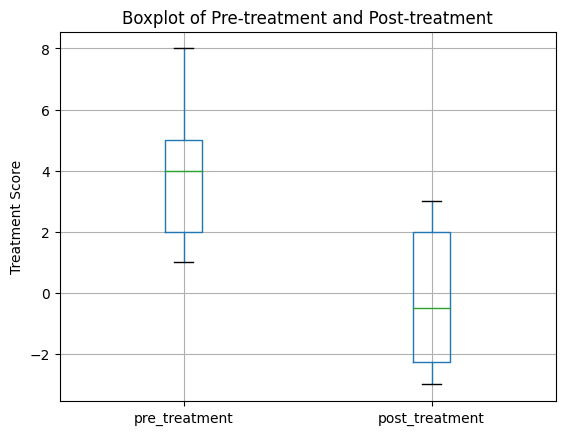

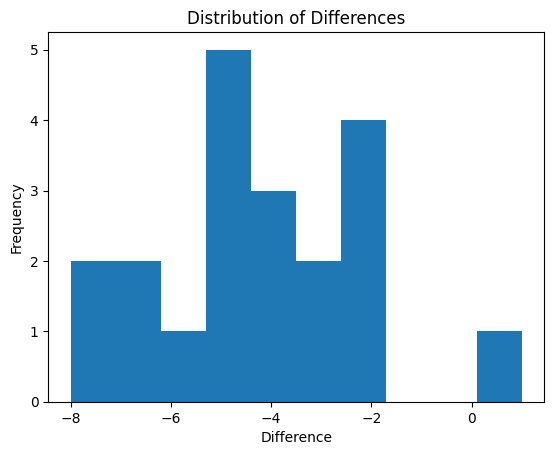

In [15]:
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()


In [16]:
#윌콕스 부호 순위 검정 수행 3
#정규분포를 따르지 않는 데이터 생성

pre_treatment = np.random.rand(20) + 1
post_treatment = np.random.rand(20) + 2

#데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

#data csv 파일로 저장
data.to_csv("./data/non_normal_data.csv", index=False, encoding='utf-8')

In [20]:
#데이터 가져오기
treatment_data = pd.read_csv('./data/non_normal_data.csv')

#윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(treatment_data['pre_treatment'], treatment_data['post_treatment'])

#결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

Statistic: 0.0
p-value: 1.9073486328125e-06
reject HO


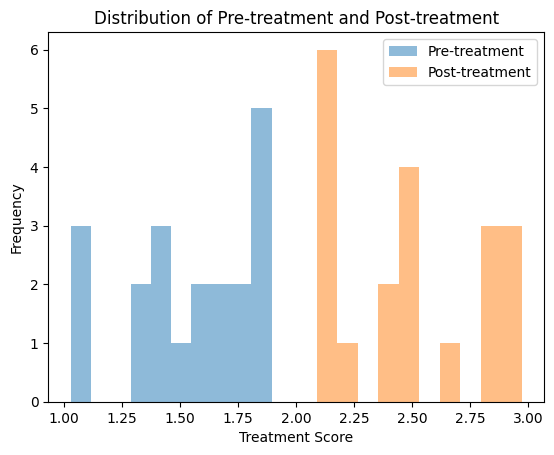

In [18]:
# 분포 시각화
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

### *윌콕슨 부호 순위 검정 - 다중 검정*

다중 검정(multiple testing)은 하나의 데이터 집합에서 여러 개의 가설 검정을 수행할 때 발생하는 문 제를 다루는 통계 분석 기법입니다. 하나의 데이터 집합에서 여러 가설 검정을 수행하면 검정을 수행 하는 만큼 오류가 발생할 가능성이 높아집니다. 이러한 오류는 제 1종 오류(타입 I 오류, False Positive) 와 제 2종 오류(타입 II 오류, False Negative)로 나뉩니다.

#### 다중 검정에 사용하는 보정법
+ Bonferroni 보정 : Bonferroni 보정은 간단하면서도 보수적인 방법으로, 각각의 가설 검정에서 유의수준을 1/m (m은 가 설의 개수)로 나누어 줍니다. 이렇게 보정된 유의수준보다 작은 p-value를 가지는 가설들만을 유의미 하다고 판단합니다. 이 방법은 가설의 개수가 작을 때에는 유용하지만, 가설 수가 많아질수록 유의 수준이 극도로 작아져, 결국 유의미한 가설을 찾는 것이 어려워집니다.
<br></br>
+ Benjamini-Hochberg(BH) 보정 : Bonferroni 보정의 단점을 보완한 방법으로, 각각의 가설 검정에서 p-value를 작은 것부터 큰 것 순서대로 정 렬합니다. 그리고 정렬된 p-value에 고유한 인덱스를 붙입니다. 이때, 인덱스 i에 해당하는 가설의 p-value가 (i/m) * alpha (alpha는 사용자가 지정한 유의수준)보다 작을 때까지만 유의미하다고 판단합니다.

In [23]:
from statsmodels.stats.multitest import multipletests

In [62]:
#다중 검정 오류 실습
#Bonferroni 보정
data = pd.read_csv("./data/treatment_data.csv")

p_values =[]

for i in range(10) :
    sample = data.sample(frac=0.5)
    st, p = wilcoxon(sample['pre_treatment'], sample['post_treatment'])
    print("sample", i+1, ':')
    print("statistic : ", st)
    print("p-value", p)
    p_values.append(p)
    if p > 0.05 :
        print("fail to reject HO")
    else :
        print("reject HO")
        
alpha = 0.05
rejects_bonf, corrected_p_bonf, _, _ = multipletests(p_values, alpha=alpha, method="bonferroni")
print("Bonferroni")
for i in range(len(rejects_bonf)) :
    if rejects_bonf[i] :
        print(f"sample : {i+1} : reject HO")
    else :
        print(f"sample : {i+1} : fail to reject HO")

sample 1 :
statistic :  1.0
p-value 0.00390625
reject HO
sample 2 :
statistic :  0.0
p-value 0.001953125
reject HO
sample 3 :
statistic :  1.0
p-value 0.00390625
reject HO
sample 4 :
statistic :  1.0
p-value 0.00390625
reject HO
sample 5 :
statistic :  0.0
p-value 0.001953125
reject HO
sample 6 :
statistic :  0.0
p-value 0.001953125
reject HO
sample 7 :
statistic :  0.0
p-value 0.001953125
reject HO
sample 8 :
statistic :  0.0
p-value 0.001953125
reject HO
sample 9 :
statistic :  1.0
p-value 0.00390625
reject HO
sample 10 :
statistic :  0.0
p-value 0.001953125
reject HO
Bonferroni
sample : 1 : reject HO
sample : 2 : reject HO
sample : 3 : reject HO
sample : 4 : reject HO
sample : 5 : reject HO
sample : 6 : reject HO
sample : 7 : reject HO
sample : 8 : reject HO
sample : 9 : reject HO
sample : 10 : reject HO


### *윌콕슨 맨 휘트니 검정*

윌콕슨-맨-휘트니 검정은 비모수적인 방법으로, 두 개의 관련 표본을 비교하는 검정 방법 중 하나입니다.

보통 윌콕슨-맨-휘트니 검정은 짝을 이룬 표본(동일한 대상의 전후 관찰 등)을 비교할 때 사용합니다. 이 때, 두 표본이 서로 대응되는 데이터라는 것이 중요합니다. 예를 들어, 같은 사람들이 전후 각각 다 른약을복용하여그차이를비교하는경우등이있습니다.

이 검정은 먼저 각 대응 쌍에 대해 차이를 계산하고, 이 차이들의 순위를 매깁니다. 이후, 순위 합계를 이용 하여 검정 통계량을 계산합니다. 검정 통계량의 분포는 자유도가 n-1인 표준 정규분포와 유사합니다.

결과적으로, 검정 통계량과 p-value를 계산하여, 통계적으로 유의한 차이가 있는지를 검정합니다. p-value 가 일정 기준값보다 작으면, 두 표본 간의 차이가 통계적으로 유의하다고 판단할 수 있습니다. 그렇지 않 으면, 두 표본 간의 차이는 통계적으로 유의하지 않다고 판단합니다.

In [63]:
#데이터 불러오기
data = pd.read_csv("./data/treatment_data.csv")
print(data)

#두 변수 간의 차이 검정
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])
print(stat, p)

    pre_treatment  post_treatment
0               5               3
1               5               1
2               8               1
3               2              -3
4               2              -2
5               8               2
6               4              -3
7               1               2
8               2              -3
9               6               3
10              6              -2
11              5               2
12              2              -3
13              5              -3
14              4               0
15              4              -1
16              5               3
17              1              -1
18              3              -2
19              4               2
1.0 3.814697265625e-06


Different distribution


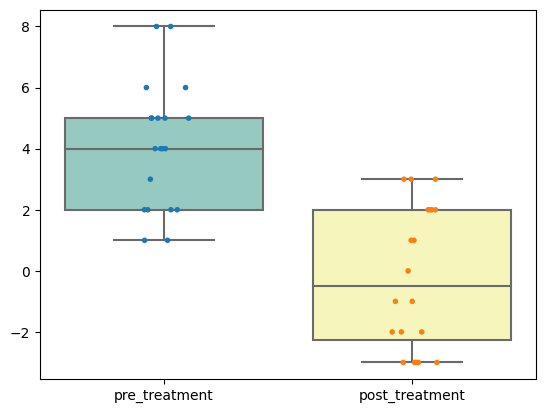

In [64]:
#검정 결과 시각화

sns.boxplot(data=data[['pre_treatment','post_treatment']], palette="Set3")
sns.stripplot(data=data[['pre_treatment','post_treatment']], size=4)
if p > 0.05 :
    print("Same distribution")
else :
    print("Different distribution")

### *맨-휘트니 검정*

두개의독립된집단에서관찰된두변수간의차이를비교하는비모수적인방법중하나입니다.

이 검정 방법은 t-test와 유사한데, t-test는 두 변수가 정규분포를 따를 때 사용됩니다. 하지만 맨-휘트니 검정 은 두 변수의 분포 형태에 대한 가정이 필요 없기 때문에, 비모수 검정 중에서 가장 보편적으로 사용되는 방 법 중 하나입니다.

주어진 데이터를 하나의 순위화된 데이터로 변환하여, 각각의 데이터가 두 집단 중 어느 쪽에 속하는지 판 단하고 이를 기반으로 검정을 수행합니다. 이 때 순위화 과정에서 동점이 발생할 수 있는데, 이 경우 랜덤으 로 순위를 부여합니다. 따라서, 이 검정 방법은 중앙값을 중심으로 두 집단의 차이를 비교합니다.

분야에 따라 U-test, Wilcoxon rank-sum test 등의 이름으로도 불립니다. 이 검정은 두 개의 독립된 집단에서 수치형 데이터를 비교하는데 사용되며, 대표적으로 A/B 테스트나 의학 연구에서 사용됩니다.

In [70]:
from scipy.stats import mannwhitneyu

In [71]:
#맨-휘트니 검정 실습 1
data = {'group1': [3,2,5,1,4,2,6,7,9,8],
       'group2' : [6,4,7,2,6,3,7,9,10,11]}

df = pd.DataFrame(data)
print(df)
df.to_csv('./data/Mann_Whitney-Test_sample_data.csv', index=False)

   group1  group2
0       3       6
1       2       4
2       5       7
3       1       2
4       4       6
5       2       3
6       6       7
7       7       9
8       9      10
9       8      11


In [72]:
#데이터 불러오기
data = pd.read_csv('./data/Mann_Whitney-Test_sample_data.csv')

#두 집단 간의 차이 검정
stat, p = mannwhitneyu(data['group1'], data['group2'])

#결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

Statistic: 32.5
p-value: 0.19622288836173518
fail to reject HO


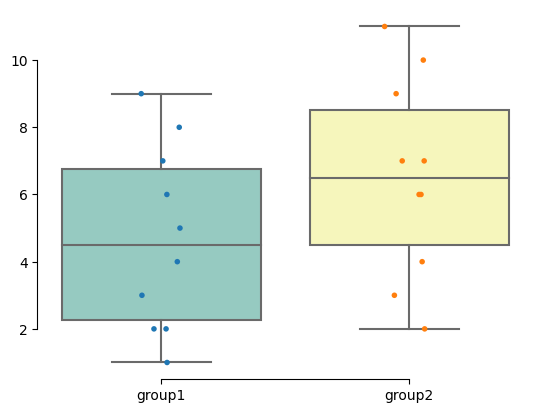

In [73]:
#시각화
sns.boxplot(data=data[['group1','group2']], palette='Set3')
sns.stripplot(data=data[['group1', 'group2']], size=4)
sns.despine(trim=True)
plt.show()

### *맨-휘트니 검정의 가정: 등분선상 가정*

맨-휘트니 검정에서의 등분산성 가정(homogeneity of variances assumption)은 두 집단의 분산이 같다는 것을 가정하는 것입니다. 이 가정이 만족되지 않으면 검정 결과가 부정확하거나 왜곡될 수 있습니다.

만약 두 집단의 분산이 같지 않다면, 등분산성 가정이 위배되었다고 합니다. 이 때는 등분산성 가정을 만 족하는 다른 검정 방법인 평균값 비교 t-검정 대신에 비모수적인 검정 방법인 맨-휘트니 검정을 사용할 수 있습니다.

등분산성 가정이 위배되었을 때 사용할 수 있는 대안적인 검정 방법은 등분산성을 가정하지 않는 검정 방법으로, 대표적으로 Welch's t-test 등이 있습니다.

In [65]:
from scipy.stats import levene

In [66]:
#데이터 불러오기
data = pd.read_csv("./data/Mann_Whitney-Test_sample_data.csv")
print(data)

   group1  group2
0       3       6
1       2       4
2       5       7
3       1       2
4       4       6
5       2       3
6       6       7
7       7       9
8       9      10
9       8      11


In [74]:
#등분산성 검정
stat, p = levene(data['group1'],data['group2'])
print(stat, p)
if p > 0.05 :
    print("fail to reject HO")
else :
    print("reject HO")

0.0 1.0
fail to reject HO


In [75]:
#맨-휘트니 검정 실습 2
group1 = [3,2,5,1,4,2,6,7,9,8]
group2 = [6,4,7,2,6,3,7,9,10,11]

st, p = mannwhitneyu(group1, group2)

print(st, p)

32.5 0.19622288836173518


In [76]:
#데이터 불러오기
data = pd.read_csv("./data/Mann_Whitney-Test_sample_data.csv")

#두 집단 간의 차이 검정
st, p = mannwhitneyu(data['group1'], data['group2'])

print(st, p)

#두 집단의 크기 계산  # len()
n1, n2 = len(data['group1']), len(data['group2'])
print(n1, n2)

if st > n1 * n2 / 2 :
    st = n1 * n2 - st

#p-value 계산
p_val = 2 * stats.norm.cdf(-abs(st) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12))
print(st)
print(p_val)

32.5 0.19622288836173518
10 10
32.5
0.014019277113959953


In [77]:
#맨-휘트니 검정 실습 3
#랜덤 데이터 생성
np.random.seed(42)
group1 = np.random.normal(loc=6, scale = 1.5, size=100)
group2 = np.random.normal(loc=7, scale = 1.5, size=100)

#csv 저장
data = pd.DataFrame({
    'group1' : group1,
    'group2' : group2
})

data.to_csv('./data/sleep_data.csv', index=False, encoding='utf-8')

In [79]:
#csv 읽기
sleep_data = pd.read_csv('./data/sleep_data.csv')
print(sleep_data)

group1_data = sleep_data['group1']
group2_data = sleep_data['group2']

      group1    group2
0   6.745071  4.876944
1   5.792604  6.369032
2   6.971533  6.485928
3   8.284545  5.796584
4   5.648770  6.758071
..       ...       ...
95  3.804728  7.577976
96  6.444180  5.674214
97  6.391583  7.230588
98  6.007670  7.087313
99  5.648119  5.285545

[100 rows x 2 columns]


In [80]:
#앤-휘트니 검정 수행
st, p_val = mannwhitneyu(group1_data, group2_data, alternative='two-sided') #two-sided는 양측검증
print(st, p_val)

#유의수준 0.05로 가설 점정
if p_val < 0.05 :
    print('두 집단 간에는 유익한 차이가 있음')
else :
    print('두 집단 간에는 유의한ㄴ 차이가 없음')

2834.0 1.2154388166891524e-07
두 집단 간에는 유익한 차이가 있음


### *크러스칼-왈라스*

3개 이상의 독립된 집단에서 비모수적으로 변수간 차이를 검정하는 방법 중 하나입니다.

일반적으로 ANOVA(분산분석)라는 방법을 사용하여 여러 집단 간의 차이를 검정하지만, ANOVA는 모집단의 분포가 정규분포를 따를 때만 적용이 가능합니다. 그러나 Kruskal-Wallis 검정은 정규분포를 따르지 않는 비모 수적인 자료에 대해서도 적용 가능합니다.

Kruskal-Wallis 검정은 각 집단의 순위 합을 비교하여 집단 간 차이가 있는지 여부를 검정합니다. 따라서, 순 위 자료에 대한 비교에 적합하며, 집단 간 분산이 다르거나 표본 크기가 서로 다른 경우에도 적용 가능합니다.

간단하게 요약하면 Kruskal-Wallis 검정은 3개 이상의 독립된 집단에서 모집단 분포에 대한 가설을 검증할 때 사용하는 비모수적인 방법입니다.

In [81]:
from scipy.stats import kruskal

In [82]:
#크러스칼-왈라스 검증 실습
np.random.seed(1)
group1 = np.random.normal(loc=5, scale=1, size=20)
group2 = np.random.normal(loc=7, scale=1, size=20)
group3 = np.random.normal(loc=10, scale=1, size=20)

print(group1, group2, group3)

[6.62434536 4.38824359 4.47182825 3.92703138 5.86540763 2.6984613
 6.74481176 4.2387931  5.3190391  4.75062962 6.46210794 2.93985929
 4.6775828  4.61594565 6.13376944 3.90010873 4.82757179 4.12214158
 5.04221375 5.58281521] [5.89938082 8.14472371 7.90159072 7.50249434 7.90085595 6.31627214
 6.87710977 6.06423057 6.73211192 7.53035547 6.30833925 6.60324647
 6.3128273  6.15479436 6.32875387 6.9873354  5.88268965 7.2344157
 8.65980218 7.74204416] [ 9.80816445  9.11237104  9.25284171 11.6924546  10.05080775  9.36300435
 10.19091548 12.10025514 10.12015895 10.61720311 10.30017032  9.64775015
  8.8574818   9.65065728  9.79110577 10.58662319 10.83898341 10.93110208
 10.28558733 10.88514116]


In [83]:
H, p_val = kruskal(group1, group2, group3)

print("H 검정 통계량 : ", H)
print("p-val : ", p_val)

H 검정 통계량 :  48.81967213114754
p-val :  2.5057797345031748e-11


### *프리드만 검정*

프리드만 검정은 Kruskal-Wallis 검정과 유사한 비모수 검정 방법 중 하나입니다. Kruskal-Wallis 검정이 독립된 여러 개의 그룹 간 비교를 다룬다면, 프리드만 검정은 관찰 대상이 2개 이상의 처리 조건에서 측정되는 경우에 사용됩니다.

In [85]:
from scipy.stats import friedmanchisquare

In [86]:
#프리드만 검증 실습
# 데이터 생성
np.random.seed(1)
group1 = np.random.normal(loc=10, scale=2, size=10)
group2 = np.random.normal(loc=12, scale=2, size=10)
group3 = np.random.normal(loc=15, scale=2, size=10)
data = np.stack([group1, group2, group3], axis=1)

In [87]:
# 프리드만 검정 수행
statistic, pvalue = friedmanchisquare(*data.T)
#*data.T는 전치가 이루어진 배열을 반환(행과 열을 바꿔준다 )
#*data.T는 전치된 배열의 각 행을 개별적인 인자로 언패킹하는 것을 의미
print("프리드만 검정 결과")
print(f"검정 통계량: {statistic}")
print(f"p-value: {pvalue}")

프리드만 검정 결과
검정 통계량: 11.400000000000006
p-value: 0.003345965457471265


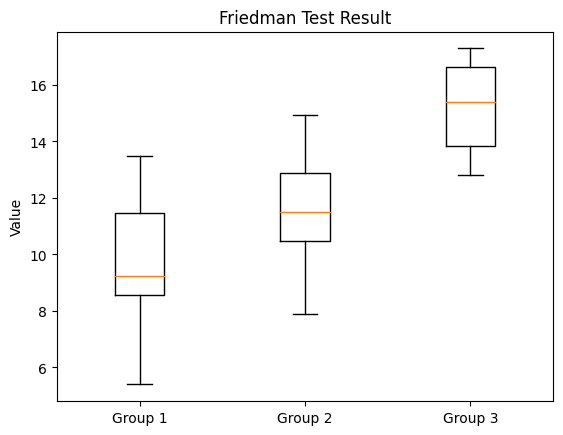

In [88]:
# 박스플롯으로 시각화
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])
ax.set_ylabel('Value')
ax.set_title('Friedman Test Result')
plt.show()